In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score

In [68]:
data=pd.read_csv("aabalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.isnull().sum #there are no missing values

<bound method DataFrame.sum of         Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     False   False     False   False         False           False   
1     False   False     False   False         False           False   
2     False   False     False   False         False           False   
3     False   False     False   False         False           False   
4     False   False     False   False         False           False   
...     ...     ...       ...     ...           ...             ...   
4172  False   False     False   False         False           False   
4173  False   False     False   False         False           False   
4174  False   False     False   False         False           False   
4175  False   False     False   False         False           False   
4176  False   False     False   False         False           False   

      Viscera weight  Shell weight  Rings  
0              False         False  False  
1              False        

In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# so we can see sex column removed and will check skewness and outliers

In [9]:
data.Rings.unique() #here target is categorical and number of rings range between 1 to 27

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [ ]:


#Rings has most values concentrated in the categories of 9,10,8 and 11

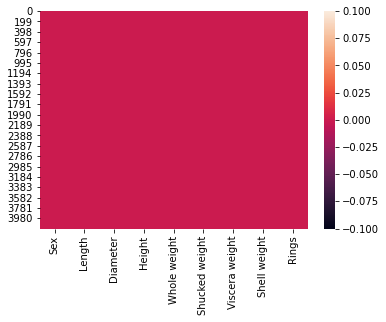

In [11]:
sns.heatmap(data.isnull())
plt.show()

In [ ]:
#so frome above plot we can come to know that dataset has no missing values

Text(0.5, 1.0, 'Sex Count')

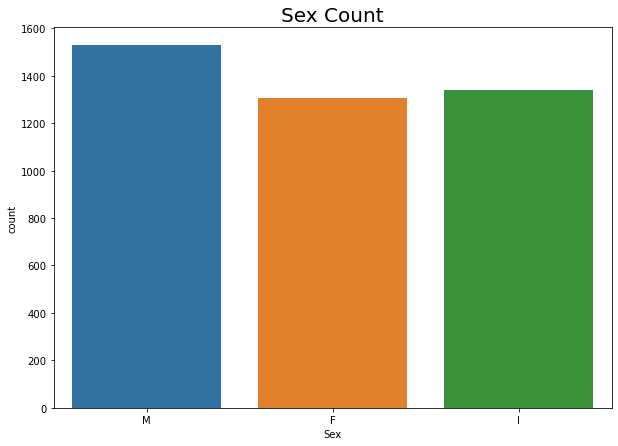

In [12]:

plt.figure(figsize=(10,7))
sns.countplot(x='Sex',data=data)
plt.title("Sex Count",fontsize=20)

In [ ]:
#so from above countplot male are high than female and infants

<AxesSubplot:xlabel='Rings', ylabel='Density'>

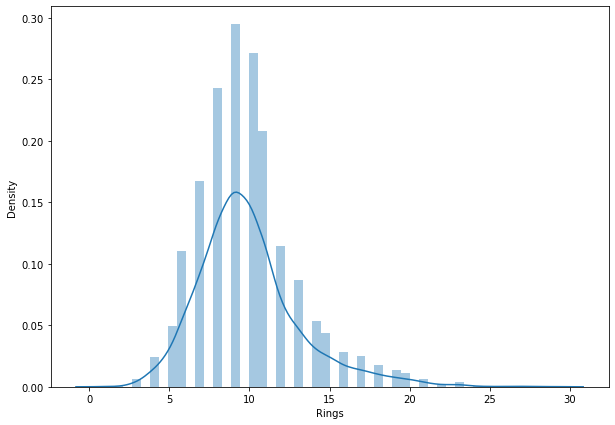

In [13]:
plt.figure(figsize=(10,7))
sns.distplot(data.Rings)

In [ ]:
#so from above plot we can see that data is right skewed and not normally distributed

<AxesSubplot:xlabel='Height'>

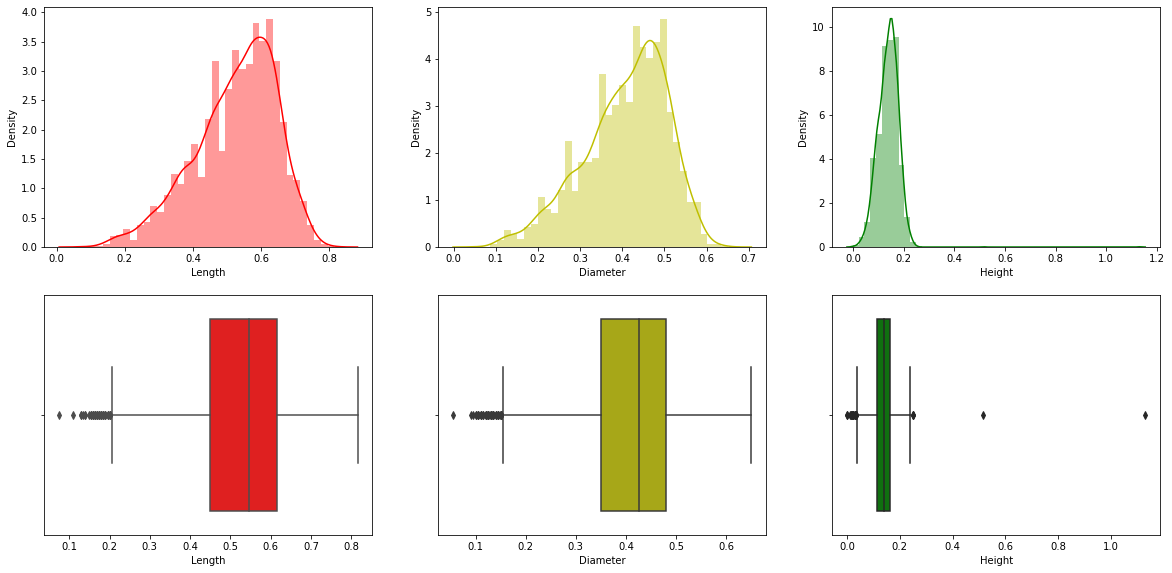

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data.Length,color='red')
plt.subplot(3,3,2)
sns.distplot(data.Diameter,color='y')
plt.subplot(3,3,3)
sns.distplot(data.Height,color='g')
plt.subplot(3,3,4)
sns.boxplot(data.Length,color='red')
plt.subplot(3,3,5)
sns.boxplot(data.Diameter,color='y')
plt.subplot(3,3,6)
sns.boxplot(data.Height,color='g')

In [ ]:
 #From upper observation we can say Length , Diameter both are left skewed and Height is Power law distributed.

<AxesSubplot:title={'center':'Distribution of Shell weight'}, xlabel='Shell weight'>

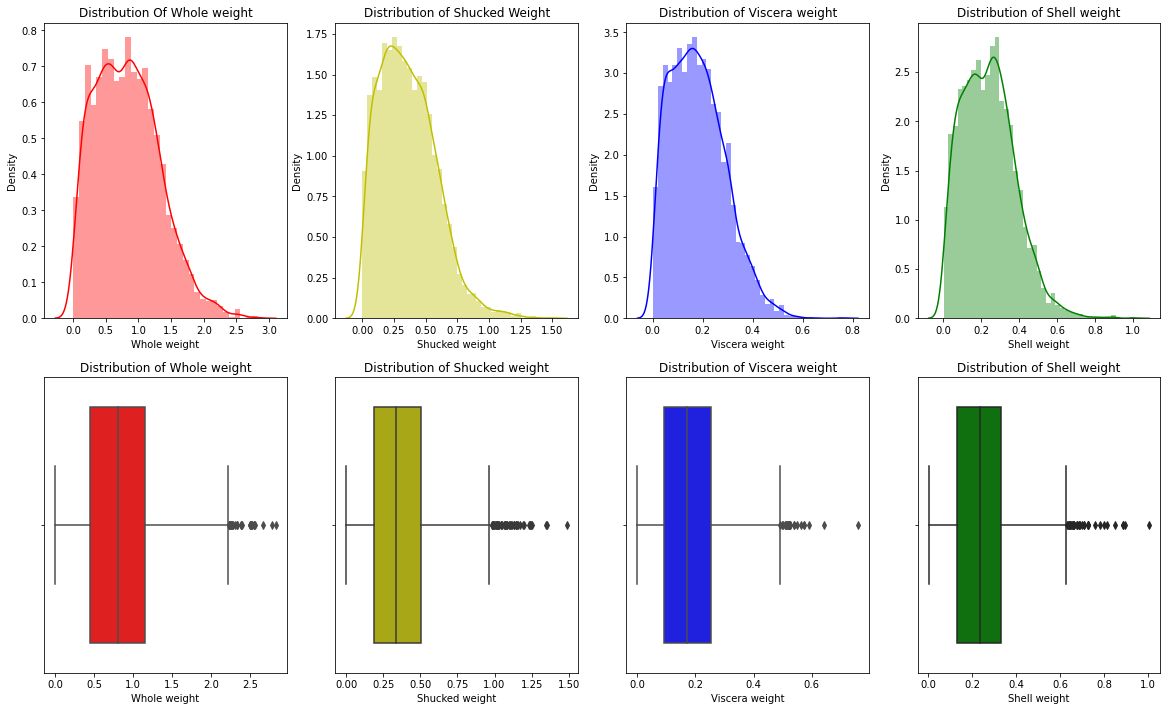

In [15]:
plt.figure(figsize=(20,25))
plt.subplot(4,4,1)
plt.title("Distribution Of Whole weight")
sns.distplot(data['Whole weight'],color='red')
plt.subplot(4,4,2)
plt.title("Distribution of Shucked Weight")
sns.distplot(data['Shucked weight'],color='y')
plt.subplot(4,4,3)
plt.title("Distribution of Viscera weight")
sns.distplot(data['Viscera weight'],color='b')
plt.subplot(4,4,4)
plt.title("Distribution of Shell weight")
sns.distplot(data['Shell weight'],color='g')
plt.subplot(4,4,5)
plt.title("Distribution of Whole weight")
sns.boxplot(data['Whole weight'],color='red')
plt.subplot(4,4,6)
plt.title("Distribution of Shucked weight")
sns.boxplot(data['Shucked weight'],color='y')
plt.subplot(4,4,7)
plt.title("Distribution of Viscera weight")
sns.boxplot(data['Viscera weight'],color='b')
plt.subplot(4,4,8)
plt.title("Distribution of Shell weight")
sns.boxplot(data['Shell weight'],color='g')

In [ ]:
#In the above distribution plots and boxplots, we see that there are skewness(right skewed) due to the outliers but still many of they are able to retain or rather showcase a bell shape curve indicating a normal distribution. So we can assume that not all outliers are to be removed and some might actually be genuine data therefore the outliers will need to be treated accordingly.

In [16]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [17]:
col=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
df=data[col]

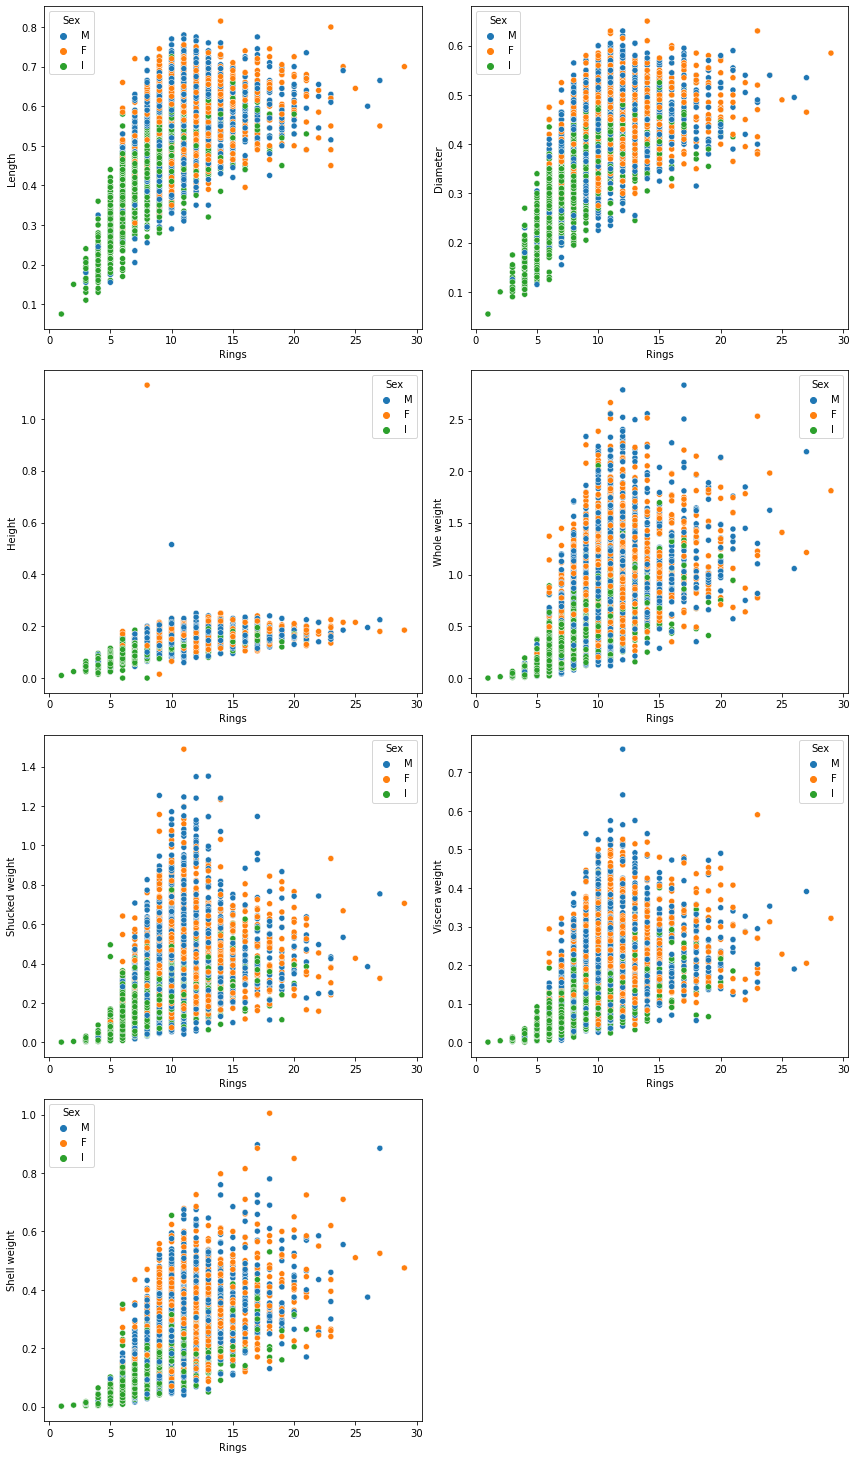

In [18]:
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data.Rings,y=data[col[i]],hue=data.Sex)
  plt.tight_layout()

In [ ]:
#From above observation we can say Height dont have a good relationship with rings and another observation shows that sex male have the high values as compared to other like F,I on Rings

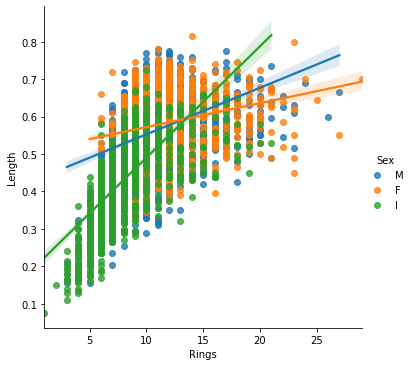

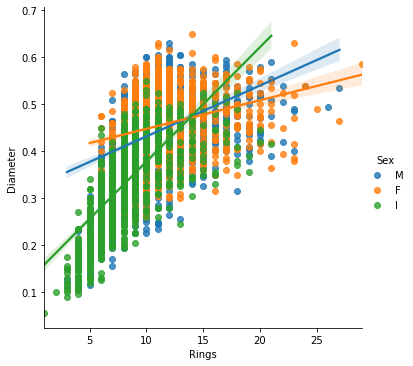

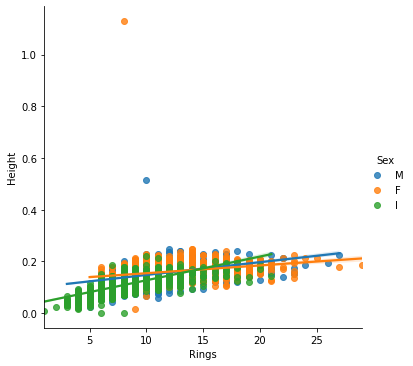

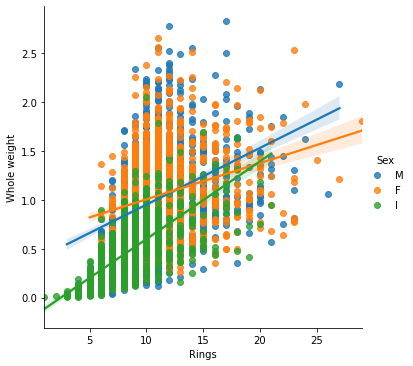

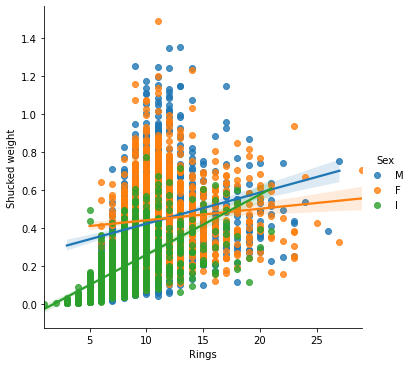

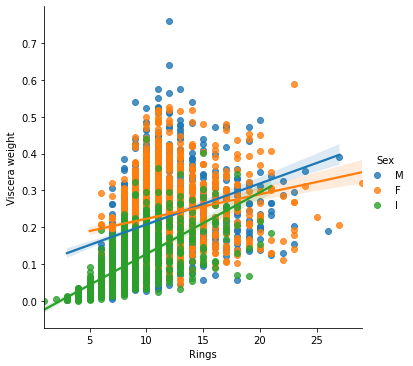

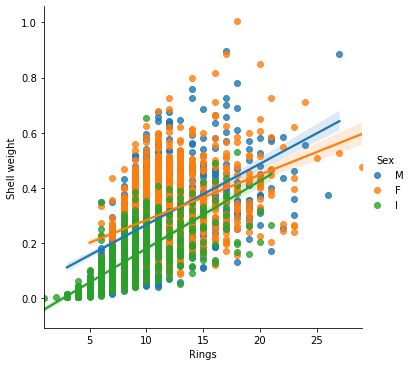

In [19]:
sns.lmplot(x='Rings',y='Length',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Diameter',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Height',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Whole weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shucked weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Viscera weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shell weight',data=data,hue='Sex')

In [ ]:
#we can see most of the time male is having height value with all the features as respect to rings

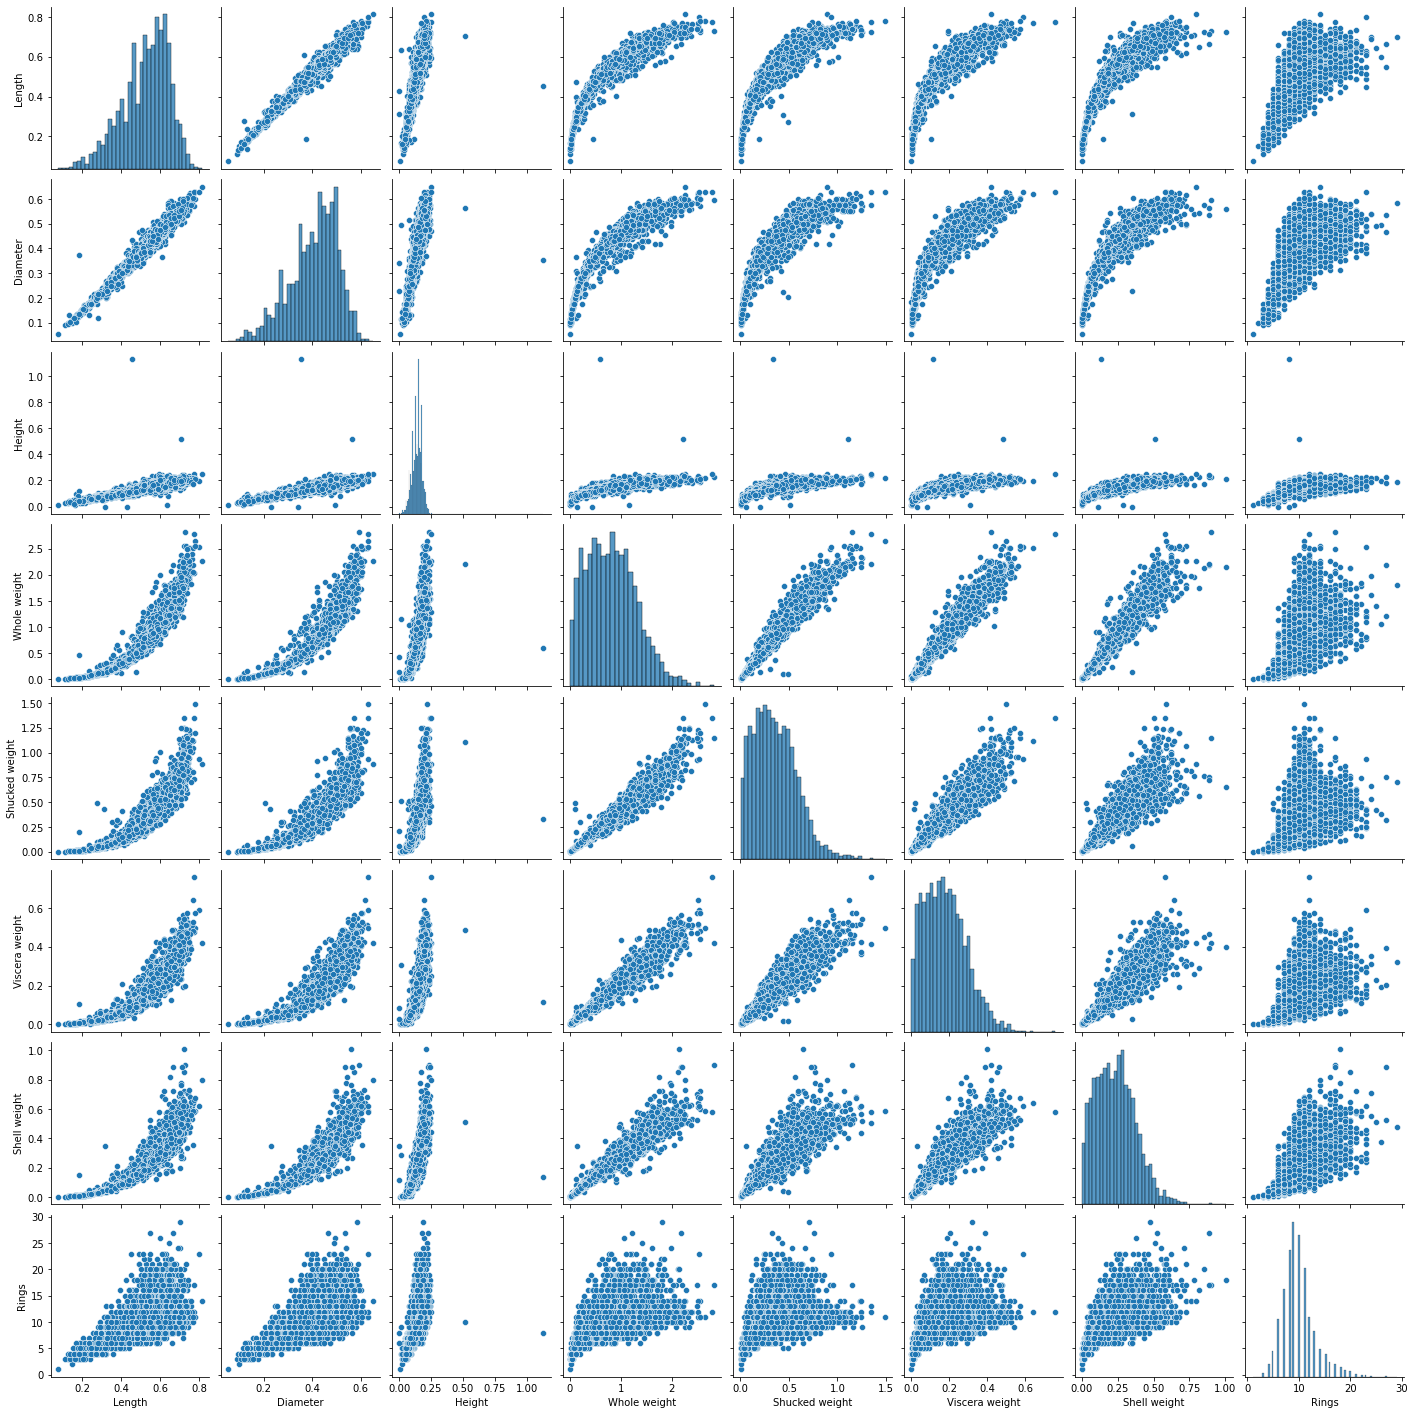

In [20]:
sns.pairplot(data)

In [ ]:
#The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data

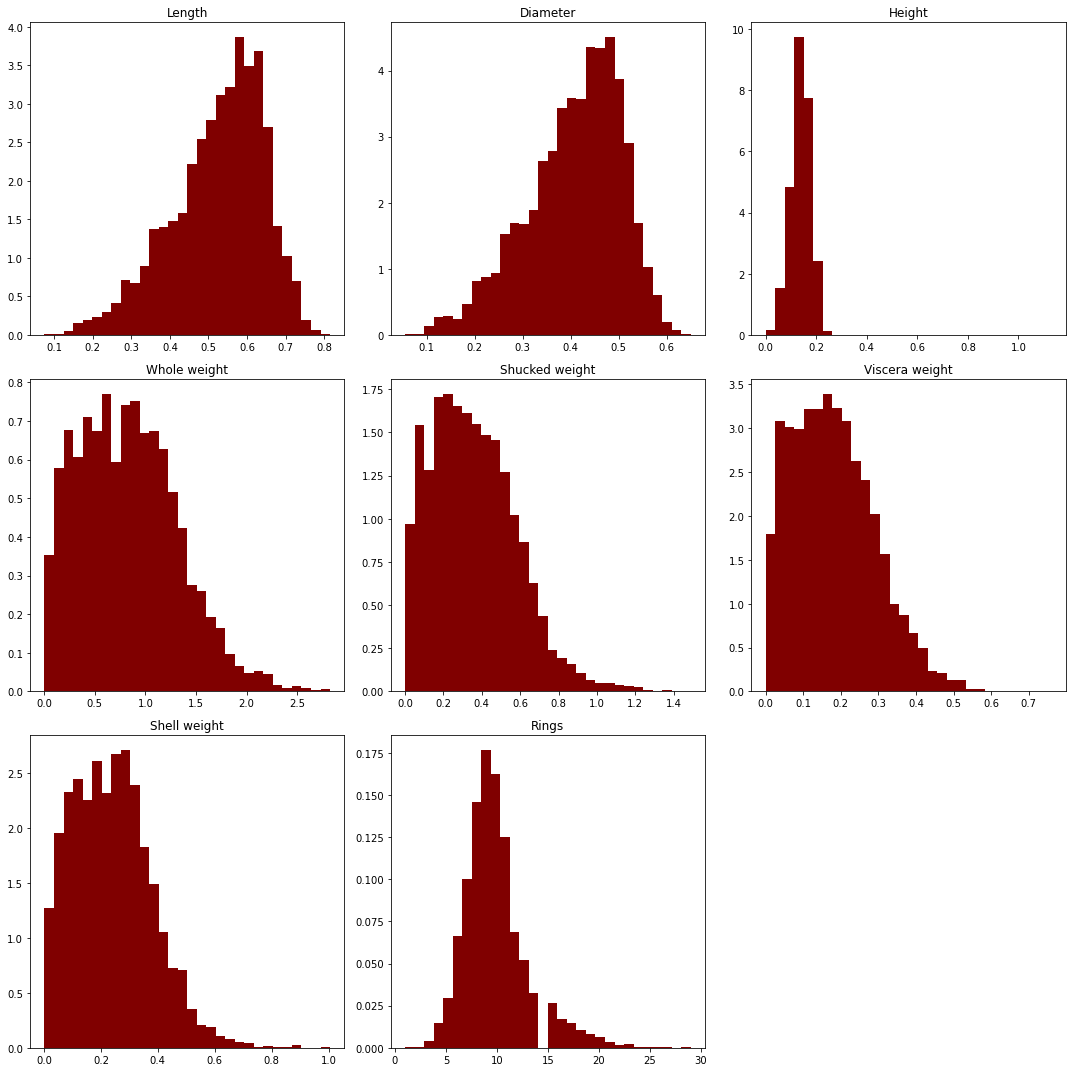

In [21]:
plt.rcParams['figure.figsize'] = (15,15)
data.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

In [ ]:
#The above histogram shows us how the data is placed in our data set and if there are sections that have no entries for it. Like if I see in 'Rings' label the section near 15 is empty showing that possible there was not enough data collected that might fill in those number points too. Again in histogram we are confirming skewness that will need to be treated.

In [22]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [23]:
def labels(x):
  if x<=10:
    return 'young'
  if x<=20:
    return 'middle_age'
  if x<=30:
    return 'old'
data['Rings']=data['Rings'].apply(labels)

In [ ]:
#We have converted target column into bins because most of the values was having less then 10 count so it will be hard for model to predict those value.

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform



In [30]:
#encoding

In [31]:
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [32]:
ordinal_column=['Sex','Rings']
data=ordinal_encoder(data,ordinal_column)

In [33]:
def preprocessing(df):
  df=df.copy()
  df=ordinal_encoder(df,['Sex'])
  return df

In [34]:
df=preprocessing(data)

In [35]:
df['Rings'].value_counts()

2.0    2730
0.0    1411
1.0      36
Name: Rings, dtype: int64

In [36]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [37]:
X=df.drop("Rings",axis=1)
y=df['Rings']

In [38]:
X['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [39]:
X.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object

In [ ]:
#checking outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

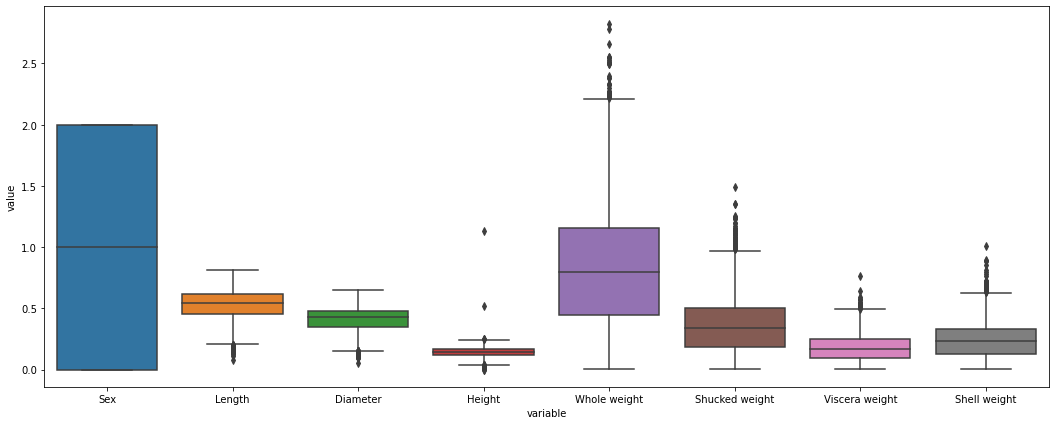

In [40]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

In [41]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]] = percentile[0]
  X[col][X[col] >=percentile[1]] = percentile[1]    #removing outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

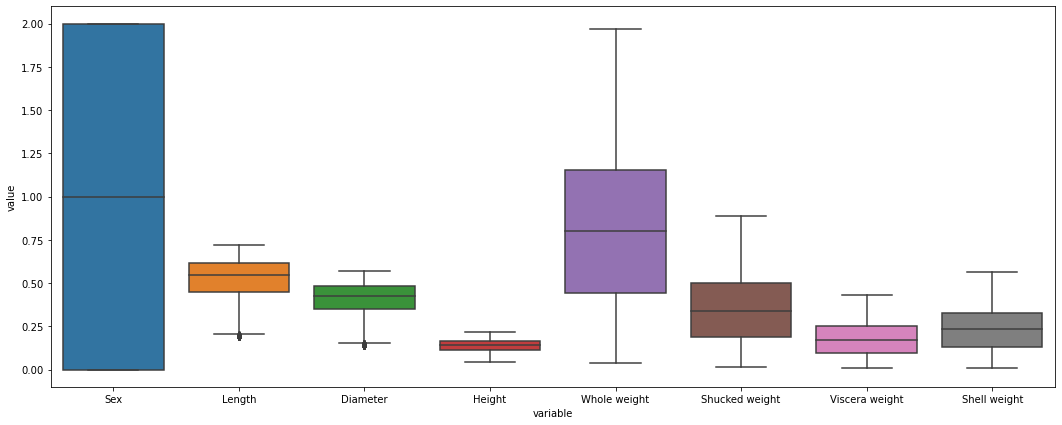

In [43]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))  #after removing outliers

In [ ]:
#so from above plots, we removed outliers without missing data

In [44]:
X_corr=X.corr()
X_corr  #checking correlation

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,1.000000,-0.036700,-0.039081,-0.041480,-0.024814,-0.007163,-0.035305,-0.035059
Length,-0.036700,1.000000,0.987158,0.902563,0.932874,0.911060,0.911035,0.912234
Diameter,-0.039081,0.987158,1.000000,0.908492,0.932555,0.906105,0.907468,0.919207
Height,-0.041480,0.902563,0.908492,1.000000,0.897166,0.850916,0.876796,0.903009
Whole weight,-0.024814,0.932874,0.932555,0.897166,1.000000,0.971411,0.968708,0.962353
Shucked weight,-0.007163,0.911060,0.906105,0.850916,0.971411,1.000000,0.936806,0.898600
Viscera weight,-0.035305,0.911035,0.907468,0.876796,0.968708,0.936806,1.000000,0.921061
Shell weight,-0.035059,0.912234,0.919207,0.903009,0.962353,0.898600,0.921061,1.000000


<AxesSubplot:>

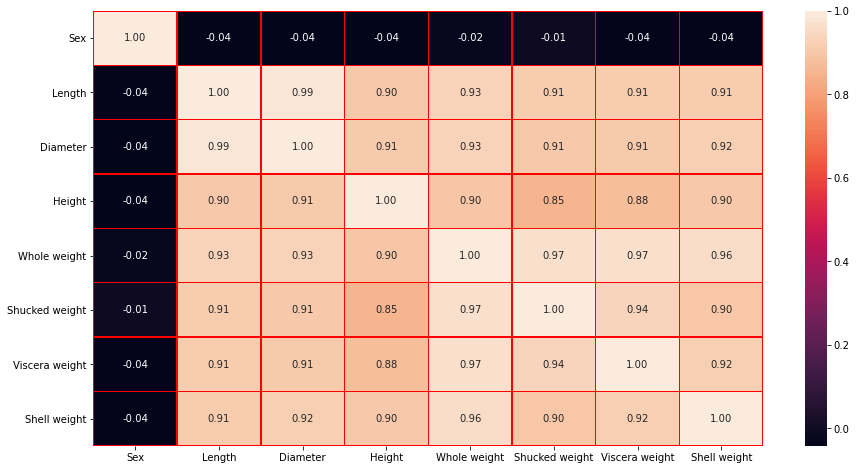

In [45]:
#MULTIVARIATE ANALYSIS
# Visualizing Correlation heatmap


plt.figure(figsize=(15,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True,linewidths=0.5,linecolor="red", fmt= '.2f')

In [ ]:
# so many columns are highly correlated with each other 


In [46]:
X.skew()

Sex              -0.098155
Length           -0.629471
Diameter         -0.607930
Height           -0.260146
Whole weight      0.373714
Shucked weight    0.462572
Viscera weight    0.422179
Shell weight      0.369726
dtype: float64

In [47]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.22450,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.09950,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.25650,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.21550,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.08950,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.37000,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.43900,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.52550,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.53100,0.2610,0.2960


In [48]:
#scaling
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [49]:
x=data.drop("Rings",axis=1)

In [50]:
X=pd.DataFrame(X,columns=x.columns)
X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.495238,0.523256,0.294118,0.247602,0.240942,0.219692,0.252317
1,1.0,0.295238,0.290698,0.264706,0.098178,0.098204,0.095711,0.107649
2,0.0,0.638095,0.651163,0.529412,0.332025,0.277483,0.315335,0.360818
3,1.0,0.466667,0.523256,0.470588,0.248638,0.230665,0.250392,0.261359
4,0.5,0.257143,0.267442,0.205882,0.087561,0.086785,0.074457,0.080524
...,...,...,...,...,...,...,...,...
4172,0.0,0.704762,0.720930,0.705882,0.440791,0.407089,0.545586,0.431344
4173,1.0,0.752381,0.697674,0.529412,0.481708,0.485880,0.487728,0.452140
4174,1.0,0.771429,0.779070,0.941176,0.590474,0.584655,0.660122,0.538037
4175,0.0,0.819048,0.802326,0.617647,0.548263,0.590935,0.597541,0.516337


In [51]:
X.skew()

Sex              -0.098155
Length           -0.629471
Diameter         -0.607930
Height           -0.260146
Whole weight      0.373714
Shucked weight    0.462572
Viscera weight    0.422179
Shell weight      0.369726
dtype: float64

In [ ]:
#we can see imbalance in data , so we should do sampling 

In [52]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=X.columns)
y_new=pd.DataFrame(y_res,columns=['Rings'])      #sampling data

<AxesSubplot:title={'center':'Balanced Data'}, xlabel='Rings', ylabel='count'>

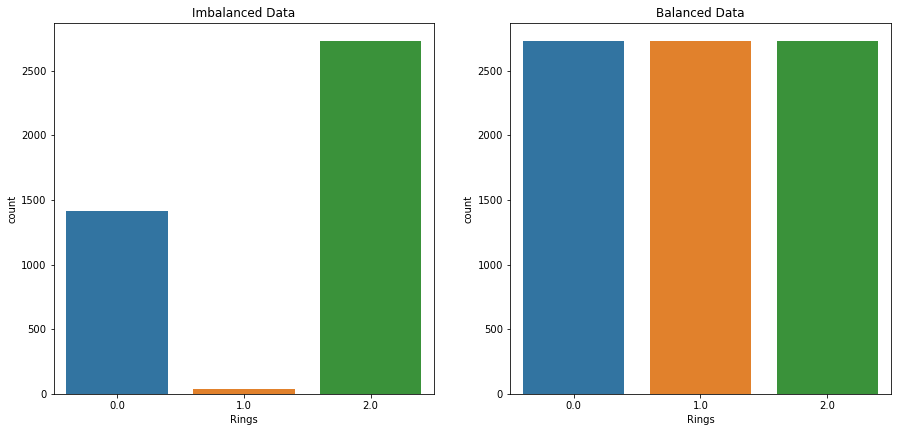

In [53]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Imbalanced Data")
sns.countplot(data['Rings'])
plt.subplot(2,2,2)
plt.title("Balanced Data")
sns.countplot(y_new['Rings'])

In [54]:
#After labeling rings into young,middle age and old it will not effect our result and we can still predict it, if it comes in young we can say its age is less then 10 and if comes to middle age, we can say its age is less than 20 or greater than 10.

In [55]:
#Handling skewness of data

X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [57]:
X_new.skew()
             

Sex              -0.049610
Length           -0.146057
Diameter         -0.142952
Height           -0.081690
Whole weight     -0.034169
Shucked weight   -0.006463
Viscera weight   -0.024649
Shell weight     -0.047846
dtype: float64

In [58]:
y_new

,Rings
0,0.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
8185,1.0
8186,1.0
8187,1.0
8188,1.0


In [59]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [64]:
#modelling
from sklearn.ensemble import RandomForestClassifier
models={"RandomForestClassifier":RandomForestClassifier()
       }



In [69]:
Model=[]
Score=[]
CVS=[]
train=[]
for name,model in models.items():
  print('***************************',name,'******************************')
  print('\n')
  Model.append(name)
  model.fit(X_train,y_train)
  print(model)
  print("\n")
  train_hat=model.predict(X_train)
  accs=accuracy_score(y_train,train_hat)
  train.append(accs)
  y_pred=model.predict(X_test)
  As_test=accuracy_score(y_test,y_pred)
  Score.append(As_test*100)
  cv=cross_val_score(model,X_new,y_new,cv=5,scoring='accuracy').mean()
  print("Cross_Val_Score==",cv)
  CVS.append(cv*100)
  print("\n")
  print("Test Score of is==",As_test)
  CVS.append(cv*100)
  print("\n")
  print("Test Score of is==",As_test)
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion Matrix:\n")
  print(cm)
  print("\n")
  report=classification_report(y_test,y_pred)
  print("Classification Report:\n")
  print(report)
  print("\n")
  print("ROC_AUC CURVE")
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['YOUNG','MIDDLE AGE','OLD'],micro=False,macro=False)
  print("\n")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,
                                       cv=5,shuffle=True,scoring='accuracy',
                                       n_jobs=-1,figsize=(12,7),title_fontsize="large",text_fontsize="large",
                                       title=name)

*************************** RandomForestClassifier ******************************


RandomForestClassifier()


Cross_Val_Score== 0.874847374847375


Test Score of is== 0.8689458689458689


Test Score of is== 0.8689458689458689


Confusion Matrix:

[[709  23 100]
 [  2 797   0]
 [192   5 629]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       832
         1.0       0.97      1.00      0.98       799
         2.0       0.86      0.76      0.81       826

    accuracy                           0.87      2457
   macro avg       0.87      0.87      0.87      2457
weighted avg       0.87      0.87      0.87      2457



ROC_AUC CURVE


NameError: name 'roc_auc' is not defined